In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#Automcompletar rápido
%config IPCompleter.greedy=True

## UPLOAD DATASETS

In [107]:
path= '../../'

File names

In [108]:
name_cat = 'cat_quality_result.pickle'
name_num = 'num_quality_result.pickle'

In [109]:
cat = pd.read_pickle(path + '/02_Data/03_Work/' + name_cat)
num = pd.read_pickle(path + '/02_Data/03_Work/' + name_num)

## EDA CATEGORICAL

### sTATISTICAL ANALISYS

In [110]:
def frec_cat(df_cat):
    resul = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Value',0: "Frec"})\
                .sort_values(by = ['Variable','Frec'])
    return(resul)

In [111]:
frec_cat(cat)

,Variable,Value,Frec
25,ambito,Healthcare Management,0.021100
28,ambito,International Business,0.021665
35,ambito,Travel and Tourism,0.025245
30,ambito,Media and Advertising,0.026375
22,ambito,"Banking, Investment And Insurance",0.043331
27,ambito,IT Projects Management,0.046157
34,ambito,Supply Chain Management,0.049736
23,ambito,Business Administration,0.052562
32,ambito,Operations Management,0.061794
31,ambito,OTHER,0.067257


In [112]:
cat = cat.loc[(cat.no_llamar != "OTHER" )&(cat.no_enviar_email!="Yes")\
        & (cat.ult_actividad!="Email Bounced")]\
.drop(columns=['conociste_facebook',
               'conociste_google',
               'conociste_periodico',
               'conociste_referencias',
               'no_enviar_email',
               'no_llamar'])

In [113]:
cat.shape

(4814, 6)

In [114]:
num = num[num.index.isin(cat.index)]

In [115]:
num

,compra,visitas_total,tiempo_en_site_total,paginas_vistas_visita,score_actividad,score_perfil
id,,,,,,
660737,0,0,0,0.0,15.0,15.0
660728,0,5,674,2.5,15.0,15.0
660727,1,2,1532,2.0,14.0,20.0
660719,0,1,305,1.0,13.0,17.0
660681,1,2,1428,1.0,15.0,18.0
...,...,...,...,...,...,...
579717,1,4,1944,2.0,14.0,17.0
579712,1,13,1226,6.5,15.0,20.0
579701,0,2,870,2.0,13.0,20.0


### Analisys plot

In [116]:
def plot_eda_cat(cat):
    
    #number of rows
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #plot
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))
    ax = ax.flat 

    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

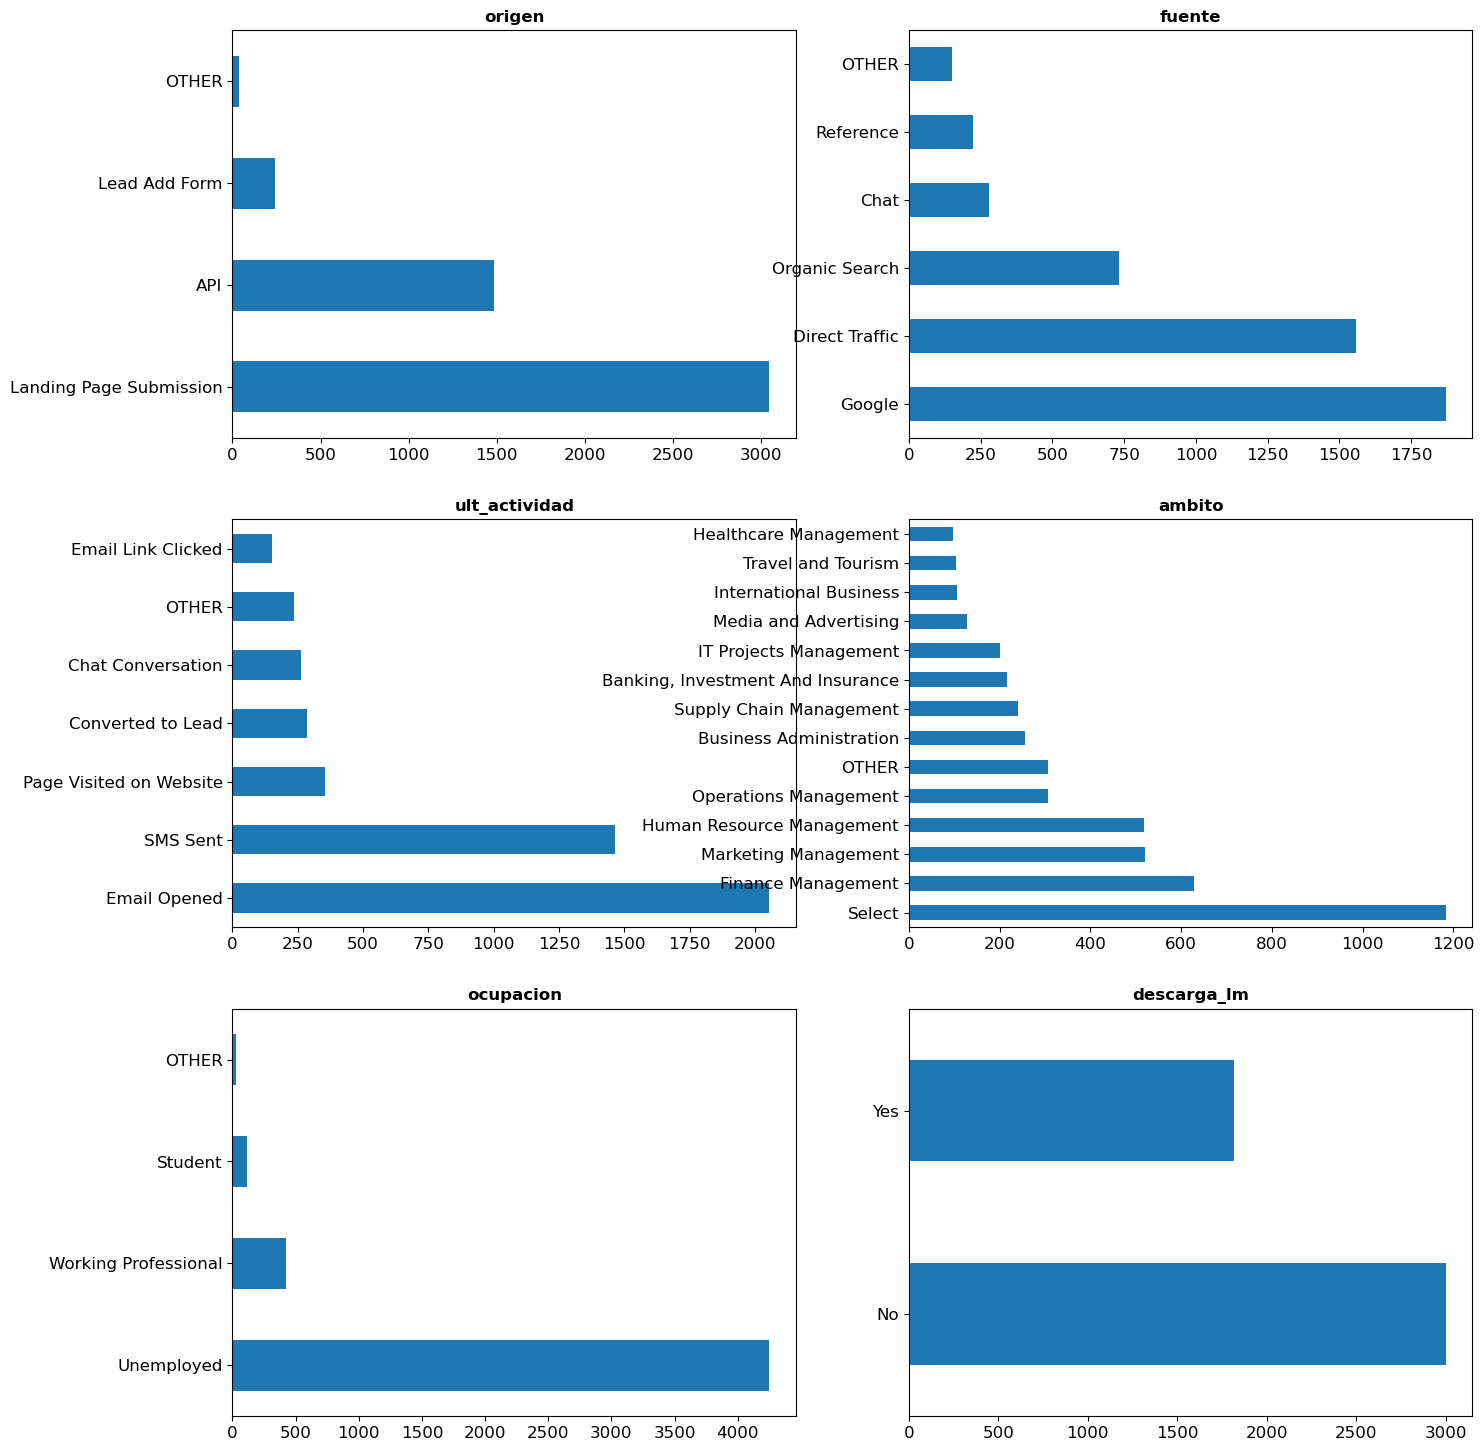

In [117]:
plot_eda_cat(cat)

## NUMERICAL EDA

### Satistical Analisys

In [118]:
def statistic_count(num):
    #describe
    statistic = num.describe().T
    #Add median
    statistic['median'] = num.median()
    #Order
    statistic = statistic.iloc[:,[0,1,8,2,3,4,5,6,7]]

    return(statistic)

In [119]:
statistic_count(num)

,count,mean,median,std,min,25%,50%,75%,max
compra,4814.0,0.420856,0.0,0.493748,0.0,0.0,0.0,1.0,1.0
visitas_total,4814.0,4.148317,3.0,3.533818,0.0,2.0,3.0,5.0,50.0
tiempo_en_site_total,4814.0,602.298712,363.5,554.867915,0.0,128.25,363.5,1094.0,2272.0
paginas_vistas_visita,4814.0,2.874952,2.5,1.905064,0.0,2.0,2.5,4.0,20.0
score_actividad,4814.0,14.064811,14.0,0.937678,7.0,14.0,14.0,14.0,18.0
score_perfil,4814.0,16.747403,17.0,1.427145,11.0,16.0,17.0,17.0,20.0


### Plot Analysis

In [120]:
def eda_plot_continuous(num):
    
    #Nunmber of rows to need
    from math import ceil
    rows = ceil(num.shape[1] / 2)

    #ploto
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))
    ax = ax.flat 

    for cada, variable in enumerate(num):
        num[variable].plot.density(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

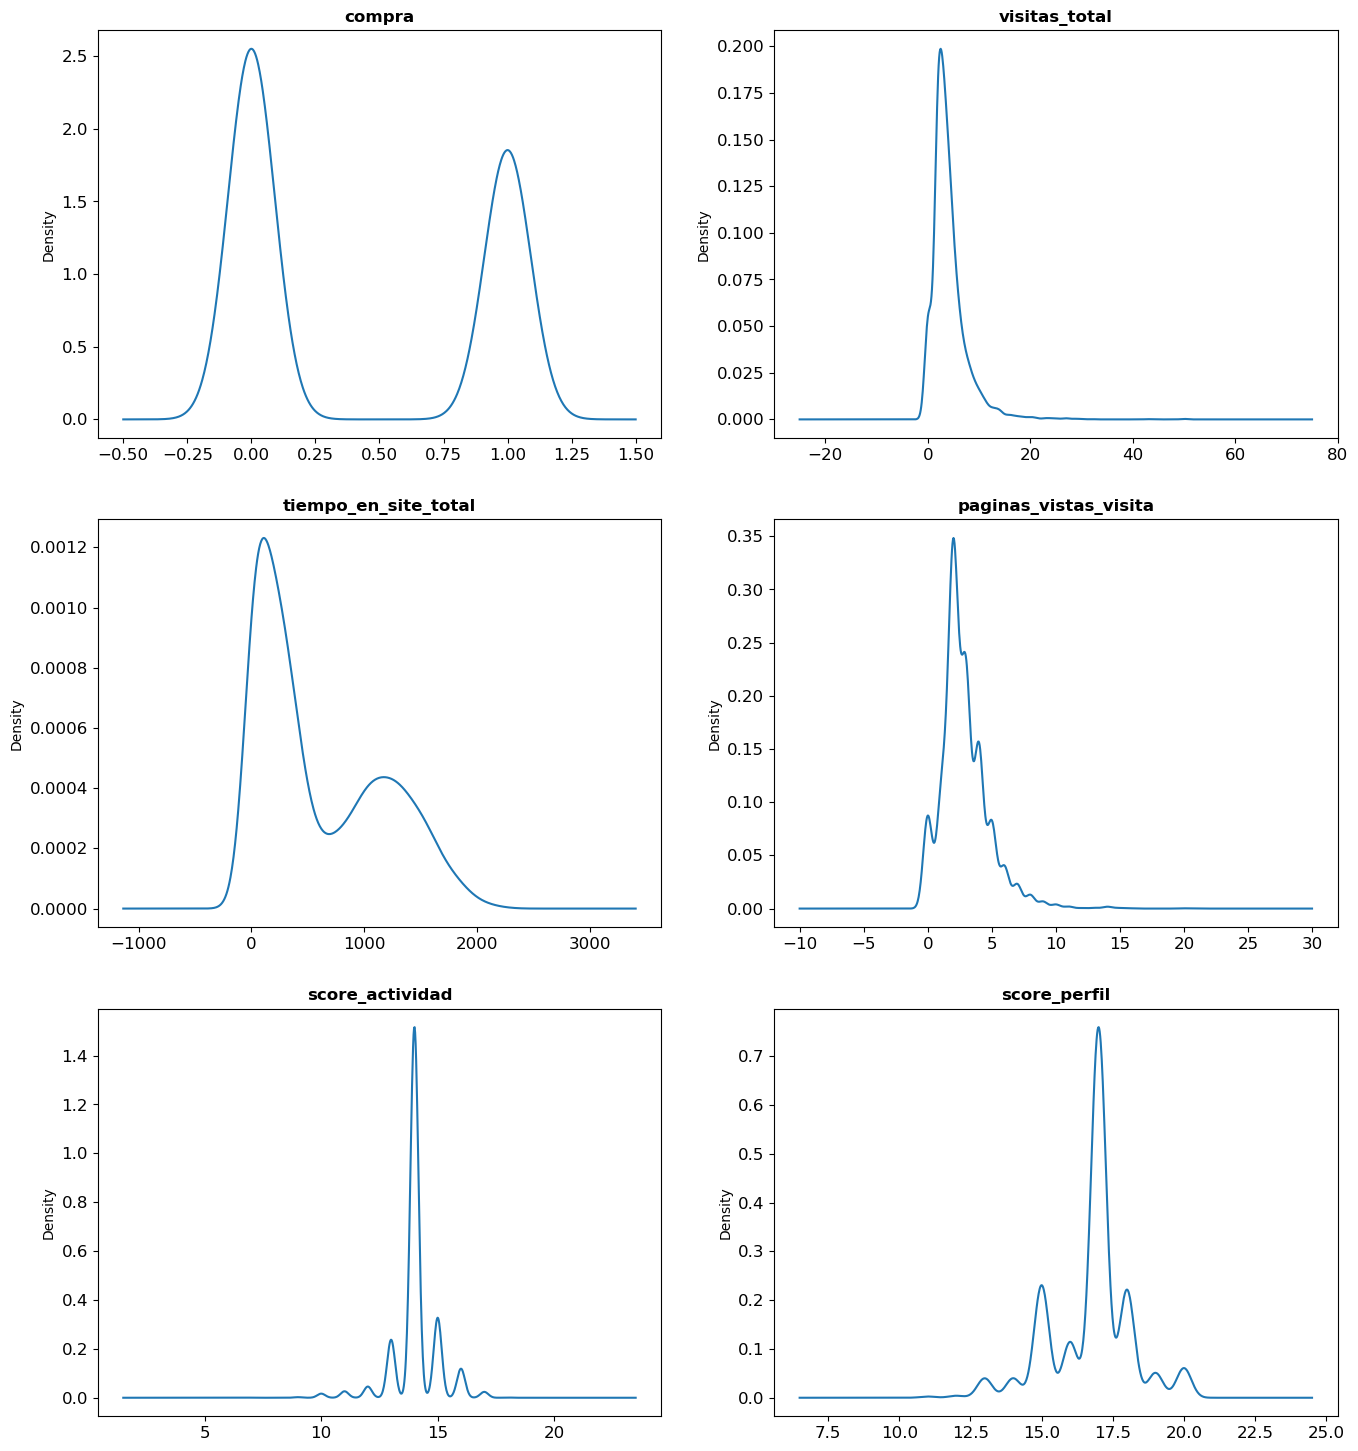

In [121]:
eda_plot_continuous(num)

## Safe datasets after data Quality

In [122]:
path_cat = path + '/02_Data/03_Work/' + 'cat_eda_results.pickle'
path_num = path + '/02_Data/03_Work/' + 'num_eda_results.pickle'

In [123]:
cat

,origen,fuente,ult_actividad,ambito,ocupacion,descarga_lm
id,,,,,,
660737,API,Chat,Page Visited on Website,Select,Unemployed,No
660728,API,Organic Search,Email Opened,Select,Unemployed,No
660727,Landing Page Submission,Direct Traffic,Email Opened,Business Administration,Student,Yes
660719,Landing Page Submission,Direct Traffic,OTHER,Media and Advertising,Unemployed,No
660681,Landing Page Submission,Google,Converted to Lead,Select,Unemployed,No
...,...,...,...,...,...,...
579717,Landing Page Submission,Google,SMS Sent,Finance Management,Unemployed,Yes
579712,Landing Page Submission,Organic Search,SMS Sent,Marketing Management,Unemployed,Yes
579701,Landing Page Submission,Google,Email Opened,Human Resource Management,Unemployed,No


In [124]:
#Guardar los archivos
cat.to_pickle(path_cat)
num.to_pickle(path_num)

In [127]:
num.isna().sum().sort_values(ascending = False)

compra                   0
visitas_total            0
tiempo_en_site_total     0
paginas_vistas_visita    0
score_actividad          0
score_perfil             0
dtype: int64